In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
import warnings
import yfinance as yf
from datetime import datetime, timedelta
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec


In [2]:
Xtrain = pd.read_csv("/content/kandles.csv")
Xtest = pd.read_csv("/content/kandles.csv")

In [20]:
df_raw = pd.read_csv('/content/kandles.csv')
print(df_raw.columns)

Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'ignore'],
      dtype='object')


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data_from_csv(filepath, start_date=None, end_date=None):
    """
    Загрузка данных о цене BTC из CSV и фильтрация по дате.

    Аргументы:
    filepath -- путь к CSV-файлу
    start_date, end_date -- границы фильтрации (строки 'YYYY-MM-DD')
    """
    # Читаем open_time как дату
    data = pd.read_csv(filepath, parse_dates=['open_time'])

    # Переименовываем колонку для единообразия
    data.rename(columns={'open_time': 'Date', 'close': 'Close'}, inplace=True)
    data.sort_values('Date', inplace=True)

    # Фильтрация по датам
    if start_date:
        data = data[data['Date'] >= pd.to_datetime(start_date)]
    if end_date:
        data = data[data['Date'] <= pd.to_datetime(end_date)]

    return data

def visualize_data(data):
    """
    Визуализация исторических цен BTC.

    Аргументы:
    data -- DataFrame с колонками Date и Close
    """
    plt.figure(figsize=(14, 6))
    plt.plot(data['Date'], data['Close'], label='Цена закрытия')
    plt.title('Исторические цены BTC')
    plt.xlabel('Дата')
    plt.ylabel('Цена в USD')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Пример использования:
# df = load_data_from_csv('/content/kandles.csv', start_date='2024-11-01', end_date='2025-05-01')
# visualize_data(df)


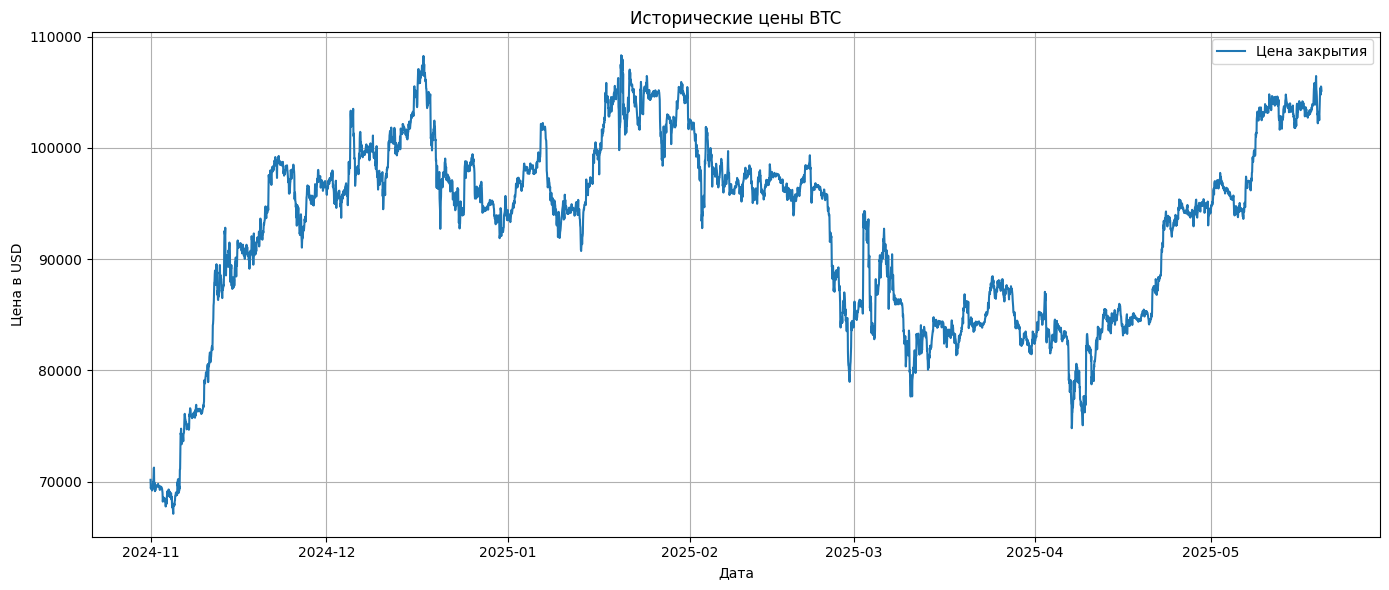

In [27]:
df = load_data_from_csv('/content/kandles.csv', start_date='2024-11-01', end_date='2025-06-05')
visualize_data(df)

Модель H2O

In [37]:
pip install h2o

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 1.6 MB/s eta 0:00:00


In [38]:
def initialize_and_train_h2o(trainX, trainY, testX, testY, max_runtime_secs=1000, max_mem_size="12G"):
    """
    Инициализация H2O и обучение модели H2O AutoML.

    Аргументы:
    trainX, trainY -- обучающие данные X и Y
    testX, testY -- тестовые данные X и Y
    max_runtime_secs -- максимальное время выполнения для AutoML
    max_mem_size -- максимальный размер памяти для H2O

    Возвращает:
    aml -- обученная модель AutoML
    test -- тестовый набор данных в формате H2O Frame
    """
    import h2o
    from h2o.automl import H2OAutoML
    import numpy as np

    # Инициализация H2O
    h2o.init(max_mem_size=max_mem_size)

    # Преобразование данных в формат H2O
    train = h2o.H2OFrame(np.hstack((trainX, trainY.reshape(-1,1))))
    test = h2o.H2OFrame(np.hstack((testX, testY.reshape(-1,1))))
    train.set_names(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'Y'])
    test.set_names(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'Y'])

    # Запуск H2O AutoML
    aml = H2OAutoML(max_models=10, seed=1, max_runtime_secs=max_runtime_secs)
    aml.train(x=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10'], y='Y', training_frame=train)

    return aml, test

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Загрузка данных
df = df

# Пример генерации признаков (здесь просто 10 предыдущих закрытий в виде фичей)
N_FEATURES = 10
df['Close'] = df['Close'].astype(float)

X, y = [], []
for i in range(N_FEATURES, len(df)):
    X.append(df['Close'].iloc[i-N_FEATURES:i].values)
    y.append(df['Close'].iloc[i])  # следующий close — это Y

X = np.array(X)
y = np.array(y)

# Разделим на train и test
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, shuffle=False)

# Обучим модель
aml, test_h2o = initialize_and_train_h2o(trainX, trainY, testX, testY)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.27" 2025-04-15; OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpl5_8d4bt
  JVM stdout: /tmp/tmpl5_8d4bt/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpl5_8d4bt/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 20 days
H2O_cluster_name:,H2O_from_python_unknownUser_qtfihc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,12 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


In [44]:
import matplotlib.pyplot as plt

def visualize_predictions(model, test_h2o, actual_y):
    """
    Визуализация предсказаний модели против реальных значений.

    Аргументы:
    model -- обученная H2O AutoML модель (aml)
    test_h2o -- тестовые данные в формате H2OFrame
    actual_y -- массив фактических значений Y
    """
    # Предсказания модели
    preds = model.leader.predict(test_h2o).as_data_frame().values.flatten()

    # График сравнения
    plt.figure(figsize=(14, 6))
    plt.plot(actual_y, label="Фактические значения", linewidth=2)
    plt.plot(preds, label="Предсказания модели", linewidth=2)
    plt.title("Сравнение предсказаний модели с реальными значениями")
    plt.xlabel("Индекс")
    plt.ylabel("Цена")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


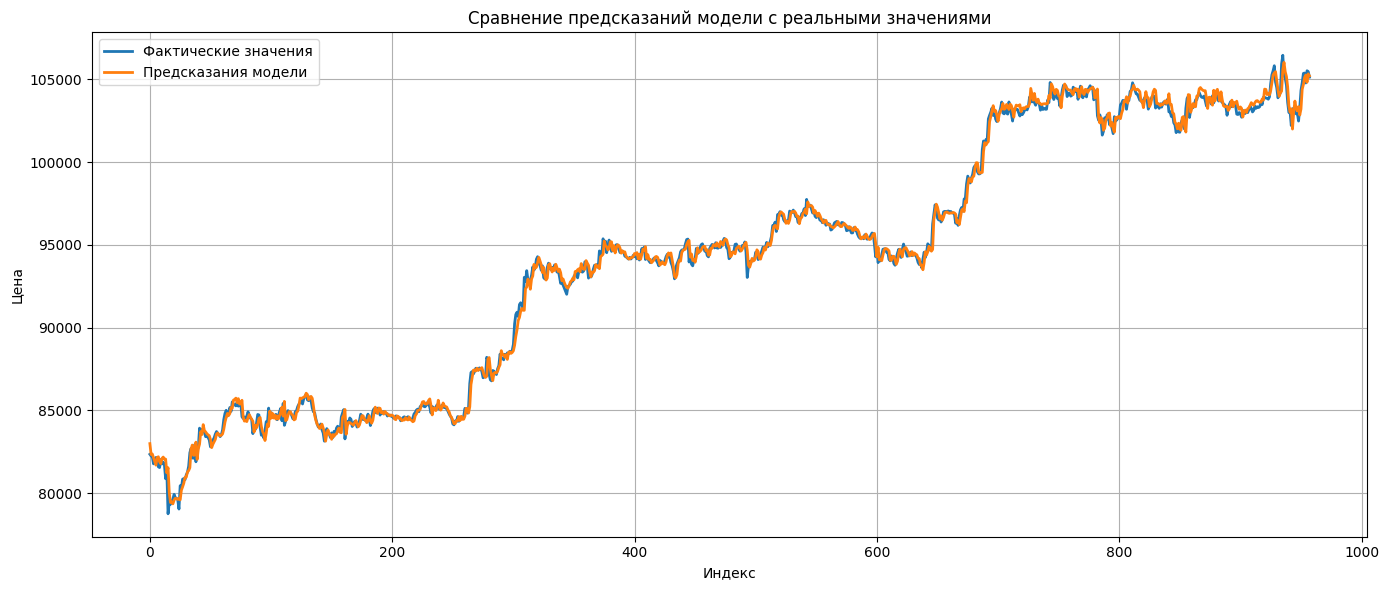

In [45]:
visualize_predictions(aml, test_h2o, testY)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

preds = aml.leader.predict(test_h2o).as_data_frame().values.flatten()

print("MAE:", mean_absolute_error(testY, preds))
print("MSE:", mean_squared_error(testY, preds))
print("R2 Score:", r2_score(testY, preds))

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
MAE: 290.7856540055182
MSE: 165261.80443629966
R2 Score: 0.9970774673465375


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Простые паттерны

In [48]:
print(df_raw.columns)

Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'ignore'],
      dtype='object')


In [49]:
# Добавим столбец "направление" (куда пошла цена):
df['next_close'] = df['Close'].shift(-1)
df['direction'] = (df['next_close'] > df['Close']).astype(int)  # 1 = рост, 0 = падение
df = df.dropna()

In [51]:
# Пример фич: размер тела свечи, длина теней, и тип свечи.
def extract_candle_features(df):
    df['body'] = abs(df['Close'] - df['open'])
    df['upper_shadow'] = df['high'] - df[['Close', 'open']].max(axis=1)
    df['lower_shadow'] = df[['Close', 'open']].min(axis=1) - df['low']
    df['bullish'] = (df['Close'] > df['open']).astype(int)
    return df

df = extract_candle_features(df)

In [52]:
# Прогнозируем direction (рост/падение):
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

features = ['body', 'upper_shadow', 'lower_shadow', 'bullish']
X = df[features].values
y = df['direction'].values

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(trainX, trainY)

preds = model.predict(testX)
print(classification_report(testY, preds))

              precision    recall  f1-score   support

           0       0.51      0.52      0.52       482
           1       0.51      0.49      0.50       478

    accuracy                           0.51       960
   macro avg       0.51      0.51      0.51       960
weighted avg       0.51      0.51      0.51       960



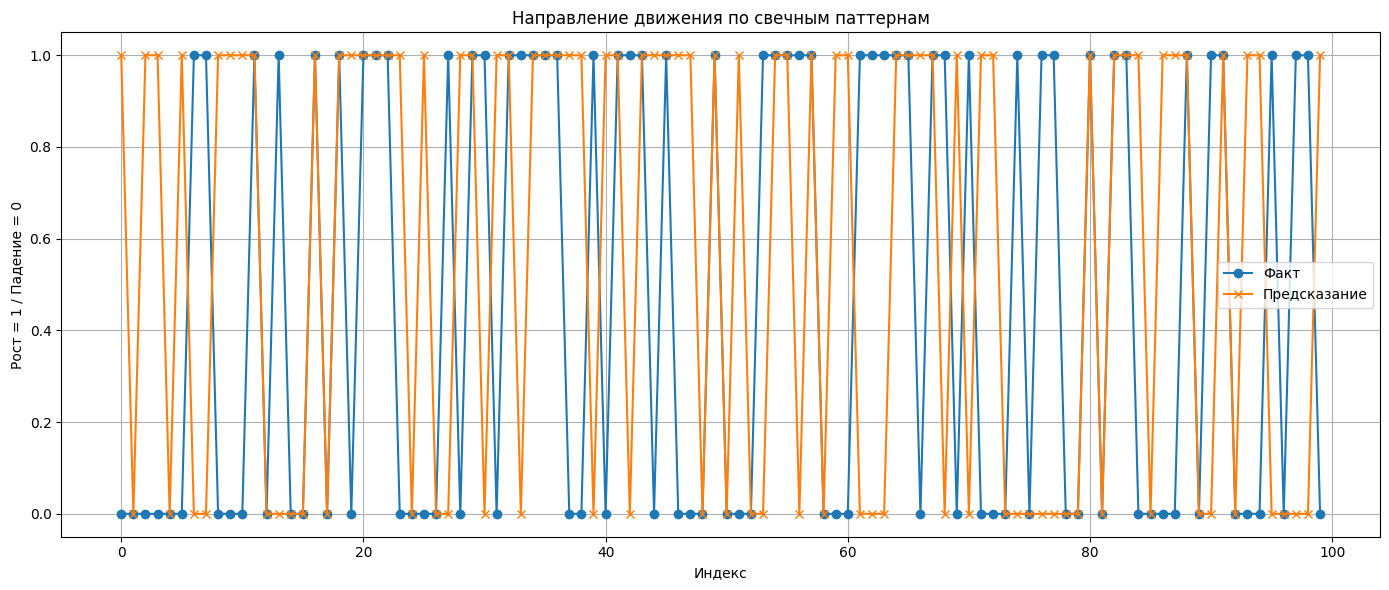

In [53]:
# визуализация
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(testY[:100], label="Факт", marker='o')
plt.plot(preds[:100], label="Предсказание", marker='x')
plt.title("Направление движения по свечным паттернам")
plt.xlabel("Индекс")
plt.ylabel("Рост = 1 / Падение = 0")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
# Если хочешь использовать готовые паттерны (doji, hammer, engulfing, и т.д.):

In [72]:
df_raw.sample(5)

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
21778,2022-01-20 09:00:00,41969.55,42085.00,41807.94,42053.53,831.485720,2022-01-20 09:59:59.999,3.487739e+07,26521,439.071900,1.842025e+07,0
43573,2024-07-16 13:00:00,63743.30,64100.00,63400.01,63419.99,1760.410840,2024-07-16 13:59:59.999,1.122872e+08,111397,817.084250,5.213233e+07,0
17793,2021-08-07 02:00:00,43170.01,43386.11,43064.77,43293.65,2094.181137,2021-08-07 02:59:59.999,9.051758e+07,99911,1025.217684,4.431446e+07,0
16556,2021-06-16 13:00:00,39063.56,39504.99,38957.56,39229.39,4262.115042,2021-06-16 13:59:59.999,1.671209e+08,133132,2272.748609,8.912881e+07,0
21888,2022-01-24 23:00:00,36369.43,36767.09,36355.29,36660.35,1391.558370,2022-01-24 23:59:59.999,5.091132e+07,41815,725.143360,2.652474e+07,0


In [76]:
df.sample(5)

,Date,open,high,low,Close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,...,next_close,direction,body,upper_shadow,lower_shadow,bullish,range,doji,prev_close,rolling_range
49304,2025-03-12 08:00:00,82447.78,82841.82,82000.29,82689.67,1582.29339,2025-03-12 08:59:59.999,1.305307e+08,312694,726.37613,...,82680.06,0,241.89,152.15,447.49,1,841.53,False,82447.79,2487.26
50392,2025-04-26 16:00:00,94373.24,94373.24,94041.00,94286.92,267.47055,2025-04-26 16:59:59.999,2.520674e+07,60633,110.83576,...,94316.79,1,86.32,0.00,245.92,0,332.24,False,94373.24,923.48
46194,2024-11-02 18:00:00,69401.99,69481.48,69215.00,69422.93,370.18861,2024-11-02 18:59:59.999,2.566592e+07,67586,170.42815,...,69510.00,1,20.94,58.55,186.99,1,266.48,True,69401.99,711.45
46405,2024-11-11 13:00:00,82168.92,82222.13,81460.19,81835.74,2377.53515,2024-11-11 13:59:59.999,1.944784e+08,373124,1211.99647,...,82484.90,1,333.18,53.21,375.55,0,761.94,False,82168.91,2039.20
47647,2025-01-02 07:00:00,95575.00,95880.00,95505.35,95822.00,452.62773,2025-01-02 07:59:59.999,4.334471e+07,53464,249.42978,...,96150.00,1,247.00,58.00,69.65,1,374.65,False,95574.99,1608.00


In [79]:
#Doji (тело свечи почти нулевое)

df['body'] = abs(df['Close'] - df['open'])
df['range'] = df['high'] - df['low']
df['doji'] = (df['body'] / df['range']) < 0.1  # Тело менее 10% от диапазона

In [83]:
# Зеркальный уровень — это уровень, где поддержка становится сопротивлением и наоборот. Это можно ловить через касания цены.

# Предположим, что уровень — это локальный экстремум
df['prev_close'] = df['Close'].shift(1)

# Уровень — последний экстремум, от которого был отскок
levels = []

for i in range(2, len(df) - 2):
    if df['low'].iloc[i] < df['low'].iloc[i - 1] and df['low'].iloc[i] < df['low'].iloc[i + 1]:
        levels.append(df['low'].iloc[i])
    elif df['high'].iloc[i] > df['high'].iloc[i - 1] and df['high'].iloc[i] > df['high'].iloc[i + 1]:
        levels.append(df['high'].iloc[i])

# Уникальные уровни округлим
levels = list(set([round(l, 2) for l in levels]))

In [85]:
# Накопление (боковик, флет)
# Обычно определяется как низкая волатильность:

df['rolling_range'] = df['high'].rolling(window=10).max() - df['low'].rolling(window=10).min()
df['accumulation'] = df['rolling_range'] < df['Close'].rolling(window=10).mean() * 0.01

In [86]:
# Если цена коснулась уровня и пошла обратно, это можно поймать так:

def touched_level(row, levels, threshold=0.001):  # 0.1% отклонение
    for level in levels:
        if abs(row['low'] - level) / level < threshold or abs(row['high'] - level) / level < threshold:
            return True
    return False

df['touched_level'] = df.apply(lambda row: touched_level(row, levels), axis=1)

In [87]:
# Финальный сигнал

# Сигнал: Doji + касание уровня + накопление
df['signal'] = df['doji'] & df['accumulation'] & df['touched_level']

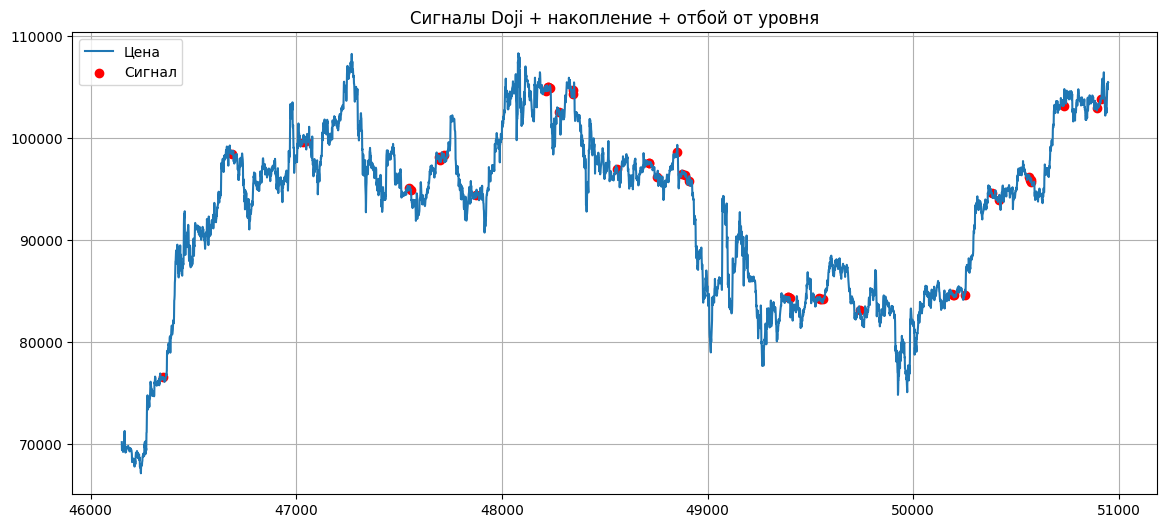

In [90]:
# Визуализация сигнала

plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Цена')
plt.scatter(df[df['signal']].index, df[df['signal']]['Close'], color='red', label='Сигнал')
plt.title("Сигналы Doji + накопление + отбой от уровня")
plt.legend()
plt.grid(True)
plt.show()